DS project.

In [ ]:
pip install yahooquery

In [ ]:
pip install sktime

In [ ]:
pip install xgboost

In [ ]:
from yahooquery import Ticker

import plotly.graph_objects as go
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sktime.utils.plotting import plot_series
from sktime.split import temporal_train_test_split
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

In [ ]:
from itertools import product

In [ ]:
import warnings


warnings.filterwarnings("ignore")

### Task 1.

##### Import data

In [ ]:
gold = Ticker('GC=F')
gold_data = gold.history(start = '2019-12-11', end = '2024-12-11', interval = '1mo')
gold_data = gold_data['close'].reset_index()
gold_data = gold_data[['date','close']]
gold_data['date'] = pd.to_datetime(gold_data['date'])

In [ ]:
gold_data

,date,close
0,2020-01-01,1582.900024
1,2020-02-01,1564.099976
2,2020-04-01,1684.199951
3,2020-05-01,1736.900024
4,2020-06-01,1793.000000
5,2020-07-01,1962.800049
6,2020-08-01,1967.599976
7,2020-09-01,1887.500000
8,2020-10-01,1877.400024
9,2020-12-01,1893.099976


#### .
I have took historical data of Gold Feb 25 (GC=F) stock quotes for 5 years from 2020-01-01 to 2024-11-01 from Yahoo.Finance. This source is good for stock analysis. Moreover, the special package helps to download data directly from the website. To do it, we should provide start and end data we are interested in and then choose frequency.

### Task 2.

#### First graph is built using sktime.

In [ ]:
gold_data_ind = gold_data.set_index(keys='date')
gold_data_ind.close = np.array(round(gold_data_ind.close))
gold_data_ind

,close
date,
2020-01-01,1583.0
2020-02-01,1564.0
2020-04-01,1684.0
2020-05-01,1737.0
2020-06-01,1793.0
2020-07-01,1963.0
2020-08-01,1968.0
2020-09-01,1888.0
2020-10-01,1877.0


In [ ]:
gold_data_ind.index = gold_data_ind.index.to_period(freq="m")

In [ ]:
gold_data_ind.describe()

,close
count,52.000000
mean,1931.250000
std,254.159891
min,1564.000000
25%,1770.000000
50%,1882.500000
75%,1975.000000
max,2738.000000


Time series of examining data using sktime

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='close'>)

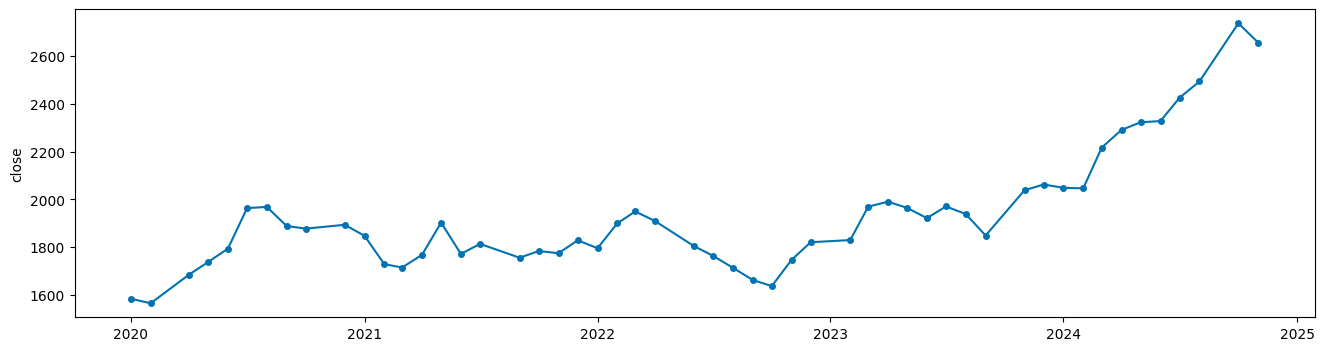

In [ ]:
plot_series(gold_data_ind)

#### Time series using plotly. I like it more, to be honest =)

In [ ]:
plot = go.Figure([go.Scatter(x=gold_data.date, y=gold_data.close)])

plot.show()

In [ ]:
import plotly.express as px

#### Bar chart of stocks through given period

In [ ]:
fig = px.bar(gold_data, x='date', y="close")
fig.show()

#### Naive forecast using trend of 5 last periods

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='close'>)

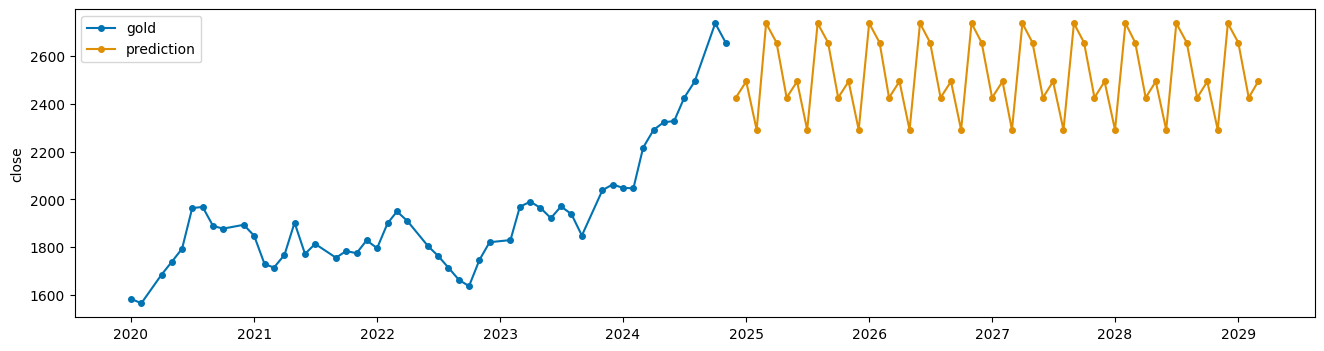

In [ ]:
fh = np.arange(1,53)

forecaster = NaiveForecaster(strategy='last',sp=5)
forecaster.fit(gold_data_ind)

gold_pred = forecaster.predict(fh)

plot_series(gold_data_ind, gold_pred, labels=['gold','prediction'])

#### Splitting data on train and test parts.

In [ ]:
# split historical data
gold_train, gold_test = temporal_train_test_split(y = gold_data_ind.close, test_size=26)

# the basic forecasting workflow
fh = ForecastingHorizon(gold_test.index, is_relative = False)
forecaster = NaiveForecaster(strategy='last',sp=10)
forecaster.fit(gold_train)
gold_pred = forecaster.predict(fh)

# specifying the evalution metric
mape = MeanAbsolutePercentageError(symmetric=False)

#compute the forecast perfomance
mape_value = mape(gold_test,gold_pred)
print("MAPE:", mape_value)

MAPE: 0.12432579588812152


### Task 3.

Separate data on trend, seasonal part and noise. We assume there are 3 seasonal periods.

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
model = ExponentialSmoothing(gold_data.close, trend='add', seasonal='add', seasonal_periods=3)
fit_ets = model.fit()
fitted_value = fit_ets.fittedvalues
trend = fit_ets.trend
season = fit_ets.season
noise = fit_ets.resid

In [ ]:
fit_ets.summary()

Dep. Variable:,close,No. Observations:,52
Model:,ExponentialSmoothing,SSE,342124.987
Optimized:,True,AIC,471.168
Trend:,Additive,BIC,484.826
Seasonal:,Additive,AICC,475.453
Seasonal Periods:,3,Date:,"Sun, 29 Dec 2024"
Box-Cox:,False,Time:,20:32:59
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9847297,alpha,True
smoothing_trend,9.7946e-05,beta,True


In [ ]:
trend_v = trend.values

In [ ]:
plot = go.Figure()

trend = go.Scatter(x = gold_data.date, y = trend_v, name = 'trend')
season = go.Scatter(x = gold_data.date, y = season, name = 'season')
noise = go.Scatter(x = gold_data.date, y = noise, name = 'noise')

plot.add_trace(trend)
plot.add_trace(season)
plot.add_trace(noise)

plot.show()

### Task 4.

I will use Gradient Boosting for the making forecast. Before you see our solution, let me point out that we run Gr.B. for two samples with monthly and daily frequencies for making comparison. The algorithm works really fast. To contrast,arima which is used in 6th task is useless in this case, it's too slow for conditions we have in this data set and there are bo boundary conditions. However, it turns out that results are underestimate. Gradient boousting shows that after 2024-01 the martingale property for stock fails (expected future value is equal to last given, i.e. expected value for given sigma algebra). It is curious result which need further analysis.

Let introduce lagged values, which will be a base for the predictions:

<!-- lags = [1, 2, 3, 5, 10, 11, 50, 55, 100, 119, 200]

lags = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 50, 55, 56, 100, 119]

lags = [1, 100, 119, 200, 250, 300, 350, 400]

lags = [1, 2, 4, 5, 10, 100, 119, 200, 250, 300, 350, 400] -->

In [ ]:
# Import data 2. monthly for the same period as in other models
gold = Ticker('GC=F')
gold_data2 = gold.history(start = '2010-01-01', end = '2024-11-01', interval = '1mo').reset_index()

gold_data2.index=gold_data2['date']

df = gold_data2['close']

df=df.to_frame()

In [ ]:
gold = Ticker('GC=F')
gold_data3 = gold.history(start = '2010-01-01', end = '2024-11-01', interval = '1d').reset_index()

gold_data3.index=gold_data3['date']

df2 = gold_data3['close']

df2=df2.to_frame()

In [ ]:
lags = [1, 2, 5, 2, 2, 20, 20, 11, 50]
lagged_df = df.copy()
for lag in lags:
    lagged_df[f'lag_{lag}'] = lagged_df['close'].shift(lag)
y1 = lagged_df['close']
y2 = lagged_df.drop(columns=['close'])


# Now devide the datasets into training and testing parts
y2_train, y2_test, y1_train, y1_test = train_test_split(y2, y1, test_size=0.3, random_state=42, shuffle=False)

index_list = y1_test.index.tolist()


# Train the model
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(y2_train, y1_train)

yP = model.predict(y2_test)


# Calculate MSE (the index of teh prediction quality)

mse_gb1 = mean_squared_error(y1_test, yP)
print(f'MSE: {mse_gb1}')

MSE: 215380.54410385664


In [ ]:
lags = [1, 2, 5, 2, 2, 20, 20, 11, 50]
lagged_df2 = df2.copy()
for lag in lags:
    lagged_df2[f'lag_{lag}'] = lagged_df2['close'].shift(lag)
y1_2 = lagged_df2['close']
y2_2 = lagged_df2.drop(columns=['close'])


# Now devide the datasets into training and testing parts
y2_train2, y2_test2, y1_train2, y1_test2 = train_test_split(y2_2, y1_2, test_size=0.3, random_state=42, shuffle=False)

index_list = y1_test2.index.tolist()


# Train the model
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(y2_train2, y1_train2)

yP2 = model.predict(y2_test2)


# Calculate MSE (the index of teh prediction quality)

mse_gb1_2 = mean_squared_error(y1_test2, yP2)
print(f'MSE: {mse_gb1_2}')

MSE: 94177.83167783587


In [ ]:
# Make a graph of the testing period 1

plot = go.Figure()

test_p = go.Scatter(x = y1_test.index, y = y1_test, name = 'Real data')
pr = go.Scatter(x = y1_test.index, y = yP, name = 'Prediction')

plot.add_trace(test_p)
plot.add_trace(pr)

plot.show()

In [ ]:
# Make a graph of the testing period 2

plot = go.Figure()

test_p2 = go.Scatter(x = y1_test2.index, y = y1_test2, name = 'Real data')
pr2 = go.Scatter(x = y1_test2.index, y = yP2, name = 'Prediction')

plot.add_trace(test_p2)
plot.add_trace(pr2)

plot.show()

The main property of Gradient Boosting in this particular case is that the quality of prediction is really high in the main part of testing period (since January 2021 until December 2023). However, in the period between January and December 2024 the quality of prediction falls tremendously (irrespectively to the training period borders and lags variations). The possible explanation to this fact is that in 2024 a new unusual trend emerged, and the price started to grow constantly with the long-run trend. Whereas our algorithm was trained on the period in which the fluctuations of the gold price had another, less steep general trend line (as a result, the algorithm lost it's validity in case of new rules of the game). Same property shows up evey time when price rises rapidly (see periods from Jul 2020 to Jan 2021, May-Jul 2021, Jan 2022 - Jul 2022, Jan 2023 - today.

See the graph above

### Task 5.

From May

In [ ]:
plot = go.Figure()

forecasts_ets = fit_ets.forecast(20)
dates_f = np.array(pd.date_range(start="2024-05-01",end="2026-01-01",freq='m'))

real2 = go.Scatter(x = gold_data.date, y = gold_data.close, name = 'real')
forecasts2 = go.Scatter(x = dates_f, y = forecasts_ets, name = 'forecast')

plot.add_trace(real2)
plot.add_trace(forecasts2)

plot.show()

From October

In [ ]:
plot = go.Figure()

forecasts = fit_ets.forecast(20)
dates_f = np.array(pd.date_range(start="2024-10-01",end="2026-01-01",freq='m'))

real2 = go.Scatter(x = gold_data.date, y = gold_data.close, name = 'real')
forecasts2 = go.Scatter(x = dates_f, y = forecasts, name = 'forecast')

plot.add_trace(real2)
plot.add_trace(forecasts2)

plot.show()

Due to the bumb in october 2024, forecast is overestimated a bit if start forecasting from 5th month (may). Nevertheless, it gives good results. Plot shows very nice forecasted values starting from october.

### Task 6.

We would like to provide SARIMA forecast.

First, find out wheter our data is stationary by Diki-Fuller test.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
print('Results:')
df_result = adfuller(gold_data_ind.close)
df_labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
for result_value, label in zip(df_result, df_labels):
    print(label + ' : ' + str(result_value))

if df_result[1] <= 0.05:
    print("Reject H0, time series is stationary.")
else:
    print("Don't reject H0, time series is not stationary.")

Results:
ADF Test Statistic : 0.2792952574160325
p-value : 0.9763743673389534
#Lags Used : 0
Number of Observations Used : 51
Don't reject H0, time series is not stationary.


In [ ]:
def search_optimal_sarima(time_series, seasonal_cycle):
    order_vals = diff_vals = ma_vals = range(0, 2)
    pdq_combinations = list(product(order_vals, diff_vals, ma_vals))
    seasonal_combinations = [(combo[0], combo[1], combo[2], seasonal_cycle) for combo in pdq_combinations]

    smallest_aic = float("inf")
    optimal_order_param = optimal_seasonal_param = None

    for order_param in pdq_combinations:
        for seasonal_param in seasonal_combinations:
            try:
                sarima_model = sm.tsa.statespace.SARIMAX(time_series,
                                                         order=order_param,
                                                         seasonal_order=seasonal_param,
                                                         enforce_stationarity=False,
                                                         enforce_invertibility=False)

                model_results = sarima_model.fit()
                if model_results.aic < smallest_aic:
                    smallest_aic = model_results.aic
                    optimal_order_param = order_param
                    optimal_seasonal_param = seasonal_param
            except:
                continue

    print('ARIMA{}x{} - AIC:{}'.format(optimal_order_param, optimal_seasonal_param, smallest_aic))

seasonal_cycle_length = 12
search_optimal_sarima(gold_data_ind, seasonal_cycle_length)

ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:302.40430361384887


In [ ]:
model_sarimax = SARIMAX(gold_data_ind, order=(1, 1, 0), seasonal_order=(1, 1, 0, 12))
results = model_sarimax.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              close   No. Observations:                   52
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -236.916
Date:                            Sun, 29 Dec 2024   AIC                            479.832
Time:                                    20:33:53   BIC                            484.823
Sample:                                01-31-2020   HQIC                           481.623
                                     - 11-30-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2175      0.235      0.927      0.354      -0.242       0.677
ar.S.L12      -0.5561      0.238     -2.334      0.020      -1.023      -0.089
sigma2      9886.7102   3292.915      3.002      0.003    3432.716    1.63e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.99   Prob(JB):                         0.82
Heteroskedasticity (H):               1.38   Skew:                             0.19
Prob(H) (two-sided):                  0.57   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The problem is unconstraint somehow. However, tests are significant. And gives more or less adequate result.

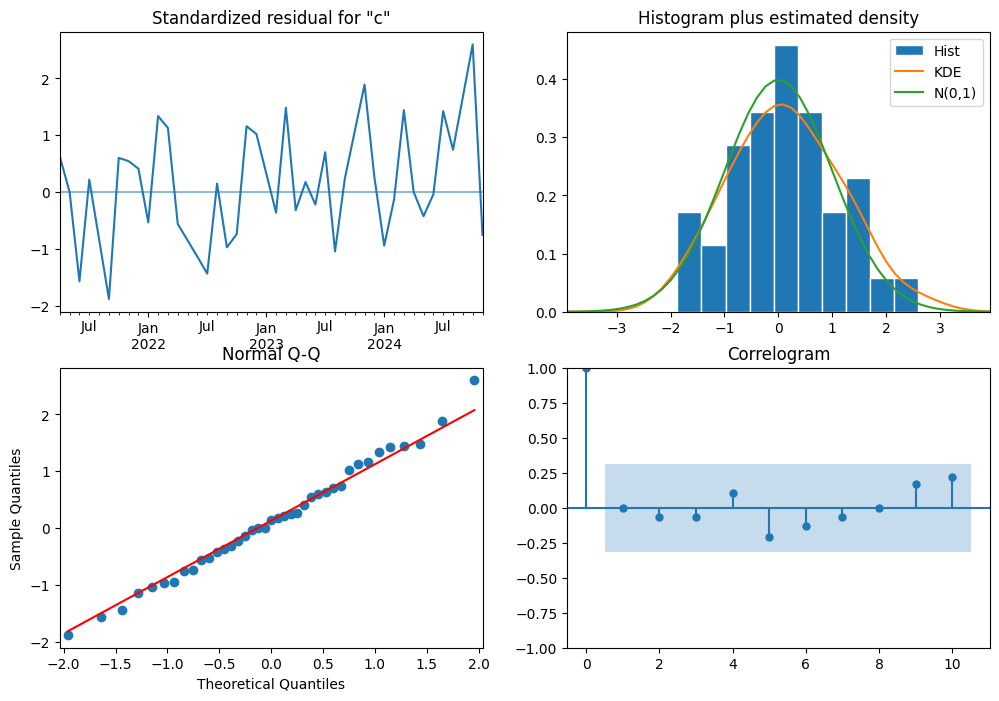

In [ ]:
results.plot_diagnostics(figsize=(12, 8))
plt.show()

1. Residual graph looks like noise. - Brilliant
2. Normal Q-Q graph reflects that residuals are normally distributed. - Nice
3. Correlogram shows that residuals are uncorellated. - Perfect
4. Histogram and estmiated density is very similar to normal distribution. - Fantastic

Thus, SARIMA is suitable for the model we consider.

Let's make forecast now. We will use MSE as accuracy metrics.

In [ ]:
st_pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
forecast_values_s = st_pred.predicted_mean
actual_values = gold_data_ind['2020-01-01':]['close']
forecast_mse_s = ((forecast_values_s - actual_values) ** 2).mean()
print('MSE of static forecast is {}'.format(round(forecast_mse_s, 2)))

MSE of static forecast is 70355.21


Static forecast

In [ ]:
plot = go.Figure()

real = go.Scatter(x = gold_data.date, y = gold_data.close, name = 'real')
forecast = go.Scatter(x = gold_data.date, y = forecast_values_s.values, name = 'forecast')

plot.add_trace(real)
plot.add_trace(forecast)

plot.show()

Due to high MSE prediction is far from perfect. Some lag is observable. However, we will assume that it's okay.

Dynamic forecast

In [ ]:
dyn_pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=True)
dynamic_forecast_values = dyn_pred.predicted_mean
mse_dynamic_forecast = ((dynamic_forecast_values - actual_values) ** 2).mean()
print('MSE of dynamic forecast is  {}'.format(round(mse_dynamic_forecast, 2)))

MSE of dynamic forecast is  3793081.56


In [ ]:
plot = go.Figure()

real = go.Scatter(x = gold_data.date, y = gold_data.close, name = 'real')
forecast_d = go.Scatter(x = gold_data.date, y = dynamic_forecast_values.values, name = 'forecast')

plot.add_trace(real)
plot.add_trace(forecast_d)

plot.show()

Curiosly, dynamic one gives no forecast.

Make forecast!

In [ ]:
pred_future = results.get_forecast(steps=20)
print(f'Mean forecast values:\n\n{pred_future.predicted_mean}')
print(f'\nCofidence intervals:\n\n{pred_future.conf_int()}')

Mean forecast values:

2024-05    2710.096000
2024-06    2705.663795
2024-07    2760.485605
2024-08    2800.720596
2024-09    2881.623758
2024-10    2992.325849
2024-11    3018.208295
2024-12    3005.968709
2025-01    3025.556687
2025-02    3082.990527
2025-03    3173.503192
2025-04    3087.498170
2025-05    3216.728337
2025-06    3228.107666
2025-07    3244.656736
2025-08    3261.404277
2025-09    3392.411510
2025-10    3482.703071
2025-11    3511.987572
2025-12    3509.335153
Freq: M, Name: predicted_mean, dtype: float64

Cofidence intervals:

         lower close  upper close
2024-05  2515.212983  2904.979017
2024-06  2398.619596  3012.707994
2024-07  2366.743822  3154.227388
2024-08  2335.122576  3266.318615
2024-09  2353.658452  3409.589064
2024-10  2408.578948  3576.072749
2024-11  2383.555793  3652.860796
2024-12  2324.199403  3687.738015
2025-01  2299.722366  3751.391008
2025-02  2315.617318  3850.363736
2025-03  2366.726987  3980.279398
2025-04  2243.155791  3931.840550
2025-0

In [ ]:
plot = go.Figure()

dates = np.array(pd.date_range(start="2024-09-01",end="2026-01-01",freq='m'))
real = go.Scatter(x = gold_data.date, y = gold_data.close, name = 'real')
forecast_ = go.Scatter(x = gold_data.date, y = forecast_values_s.values, name = 'forecast')
add_one_year = go.Scatter(x = dates, y = pred_future.predicted_mean.values, name = 'one year forecast')

plot.add_trace(real)
plot.add_trace(forecast)
plot.add_trace(add_one_year)
plot.add_traces([go.Scatter(x = dates, y = pred_future.conf_int()['upper close'],
                           mode = 'lines', line_color = 'rgba(0,0,0,0)',
                           showlegend = False),
                go.Scatter(x = dates, y = pred_future.conf_int()['lower close'],
                           mode = 'lines', line_color = 'rgba(0,0,0,0)',
                           name = 'confidence interval',
                           fill='tonexty', fillcolor = 'rgba(255, 0, 0, 0.2)')])

plot.show()

Perfect forecast with good confidence interval.

It was fun!)

### Task 7.

In [ ]:
metrics = {
    'ETS': {
        'MAE': mean_absolute_error(gold_data.close, fit_ets.forecast(52)),
        'MSE': mean_squared_error(gold_data.close, fit_ets.forecast(52)),
        'MAPE': np.mean(np.abs((gold_data.close - fit_ets.forecast(52)) / actual_values)) * 100,
        'RMSE': np.sqrt(mean_squared_error(gold_data.close, fit_ets.forecast(52)))
    },
    'GBM': {
        'MAE': mean_absolute_error(y1_test, yP),
        'MSE': mean_squared_error(y1_test, yP),
        'MAPE': np.mean(np.abs((y1_test - yP) / y1_test)) * 100,
        'RMSE': np.sqrt(mean_squared_error(y1_test, yP))
    },
    'SARIMAX': {
        'MAE': mean_absolute_error(actual_values, forecast_values_s),
        'MSE': forecast_mse_s,
        'MAPE': np.mean(np.abs((actual_values - forecast_values_s) / actual_values)) * 100,
        'RMSE': np.sqrt(mean_squared_error(actual_values, forecast_values_s))
    }
}

print(pd.DataFrame(metrics))

               ETS            GBM       SARIMAX
MAE   1.217949e+03     396.793810    122.566922
MSE   1.520569e+06  215380.544104  70355.206035
MAPE           NaN      19.404404      6.795282
RMSE  1.233114e+03     464.091095    265.245558


ETS looks most appropriate for both easiness of application and best metrics. It is very straightforward for time series with trends and seasonality as we have.

Gradient Boosting gives perfect fit models without extra pattern changes. Metrics are the highest for the current dataset.

SARIMAX takes second place, I guess, from the point of use it here since it accounts for both seasonal effects and autoregressive components. However, we need seasonal effect here.

Hence, ETS model is best forecast model for asset prices among those which we consider.


### Task 8.

See meme in the repository =)